<a href="https://colab.research.google.com/github/Tarun1220/My-HDS5210_InClass/blob/master/HDS_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring the Impact of Food Supply on Adolescent Health: A Data-Driven Analysis of Obesity, Overweight and Thinness Trends**








**Introduction**

 In this project I am going to showcase the intricate relationship between food supply and adolescent health indicators, focusing on how the availability of different food items impacts rates of obesity, overweight, and thinness across various countries. Utilizing datasets named "FAOSTAT" and "Global_Nutrition_Report_dataset", the analysis combines food supply metrics with health-related statistics to uncover meaningful patterns and insights.

The FAOSTAT Dataset provides quantitative data on food supply measurements such as "Domestic supply quantity" and "Food," offering a comprehensive view of food availability. Complementing this, the Global_Nutrition_Report_dataset delivers health statistics, including adolescent obesity, overweight, and thinness rates, enabling an in-depth exploration of nutritional impacts.

Key transformations, such as deriving a Supply Efficiency metric (food quantity per unit of obesity rate), scaling quantitative values, and encoding categorical variables, prepare the data for analysis. Statistical techniques like aggregation and visualization methods—correlation heatmaps, scatter plots, box plots, and pair plots—help identify trends and correlations. Time-series analyses and bubble charts further enhance the understanding of how food supply changes over time influence health metrics.

This project highlights the critical role of food distribution in shaping adolescent health outcomes. By analyzing average health indicators across food items and aggregating data by countries and supply metrics, the study provides actionable insights for improving food policies and combating health challenges such as obesity and malnutrition.

This analysis not only supports informed decision-making in public health and nutrition but also demonstrates the value of data-driven approaches to solving global health issues.

**Accessing and Cleaning FAOSTAT data**

By performing data accessing and cleaning, it ensures the FAOSTAT dataset's accuracy, consistency, and usability. The raw data often includes irrelevant columns, missing values, duplicates, and inconsistent formats that can distort analyses. Cleaning ensures critical metrics like "Domestic supply quantity" and "Food" are retained while removing noise and outdated records.

By standardizing column names and formats we can enhance compatibility with other datasets, such as the Global_Nutrition_Report_dataset, enabling seamless integration. Filtering relevant years and handling missing values improves analysis quality by focusing on meaningful trends and relationships.

By eliminating redundancies and outliers, the cleaning process ensures reliable insights while saving time during analysis. This foundational step transforms the FAOSTAT data into a structured and consistent format, allowing accurate visualizations, aggregations, and meaningful correlations with health indicators.

In [3]:
import pandas as pd

# File paths
faostat_file_path = '/content/FAOSTAT_data_en_11-18-2024.csv'

# Load the FAOSTAT data
def load_faostat_data(file_path):
    """
    Load the FAOSTAT CSV file and print basic information.

    Parameters:
        file_path (str): Path to the FAOSTAT dataset file.

    Returns:
        pd.DataFrame: Loaded FAOSTAT dataset.
    """
    data = pd.read_csv(file_path)
    print(f"FAOSTAT Data Loaded: {data.shape[0]} rows, {data.shape[1]} columns")
    print("Columns in FAOSTAT data:")
    print(data.columns.tolist())
    return data

# Load data
faostat_data = load_faostat_data(faostat_file_path)



FAOSTAT Data Loaded: 106082 rows, 15 columns
Columns in FAOSTAT data:
['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code (FBS)', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note']


In [4]:
# Clean and restructure FAOSTAT data
def clean_faostat_data(data):
    """
    Clean and restructure the FAOSTAT dataset:
    - Select relevant columns.
    - Rename columns for clarity.
    - Drop rows with missing values.
    - Filter by years 2010–2021.

    Parameters:
        data (pd.DataFrame): The raw FAOSTAT dataset.

    Returns:
        pd.DataFrame: The cleaned and structured FAOSTAT dataset.
    """
    print("\nCleaning FAOSTAT data...")
    cleaned_data = data[['Area', 'Item', 'Element', 'Year', 'Value', 'Unit']].copy()
    cleaned_data = cleaned_data.rename(columns={
        'Area': 'Country',
        'Item': 'Food_Item',
        'Element': 'Measurement',
        'Value': 'Quantity'
    })
    cleaned_data = cleaned_data.dropna()
    cleaned_data = cleaned_data[(cleaned_data['Year'] >= 2010) & (cleaned_data['Year'] <= 2021)]

    print(f"Cleaned FAOSTAT Data: {cleaned_data.shape[0]} rows, {cleaned_data.shape[1]} columns")
    print("Columns in cleaned FAOSTAT data:")
    print(cleaned_data.columns.tolist())
    return cleaned_data

# Save the cleaned FAOSTAT data
def save_cleaned_data(data, file_path):
    """
    Save the cleaned FAOSTAT dataset to a CSV file.

    Parameters:
        data (pd.DataFrame): The cleaned FAOSTAT dataset.
        file_path (str): Path to save the cleaned dataset.
    """
    data.to_csv(file_path, index=False)
    print(f"\nCleaned FAOSTAT data saved to: {file_path}")

# Clean and save the data
faostat_cleaned = clean_faostat_data(faostat_data)
cleaned_faostat_file = '/content/redefined_cleaned_FAOSTAT_data.csv'
save_cleaned_data(faostat_cleaned, cleaned_faostat_file)



Cleaning FAOSTAT data...
Cleaned FAOSTAT Data: 106082 rows, 6 columns
Columns in cleaned FAOSTAT data:
['Country', 'Food_Item', 'Measurement', 'Year', 'Quantity', 'Unit']

Cleaned FAOSTAT data saved to: /content/redefined_cleaned_FAOSTAT_data.csv


***Test Codes***

In [5]:
def test_load_faostat_data():
    try:
        data = load_faostat_data('/content/FAOSTAT_data_en_11-18-2024.csv')
        assert data is not None, "FAOSTAT data could not be loaded."
        assert data.shape[1] >= 6, "FAOSTAT data does not have enough columns."
        print("Test 1 Passed: FAOSTAT data loaded successfully.")
    except Exception as e:
        print(f"Test 1 Failed: {e}")

test_load_faostat_data()


FAOSTAT Data Loaded: 106082 rows, 15 columns
Columns in FAOSTAT data:
['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code (FBS)', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note']
Test 1 Passed: FAOSTAT data loaded successfully.


In [6]:
def test_clean_faostat_data():
    try:
        data = pd.DataFrame({
            'Area': ['USA', 'USA', 'India', 'India'],
            'Item': ['Wheat', 'Rice', 'Wheat', 'Rice'],
            'Element': ['Production', 'Production', 'Production', 'Production'],
            'Year': [2020, 2021, 2021, 2019],
            'Value': [5000, 3000, 4500, 2500],
            'Unit': ['1000 t', '1000 t', '1000 t', '1000 t']
        })
        cleaned_data = clean_faostat_data(data)
        assert not cleaned_data.isnull().any().any(), "Cleaned data contains missing values."
        assert cleaned_data['Year'].between(2010, 2021).all(), "Year filter failed."
        print("Test 2 Passed: FAOSTAT data cleaned successfully.")
    except Exception as e:
        print(f"Test 2 Failed: {e}")

test_clean_faostat_data()



Cleaning FAOSTAT data...
Cleaned FAOSTAT Data: 4 rows, 6 columns
Columns in cleaned FAOSTAT data:
['Country', 'Food_Item', 'Measurement', 'Year', 'Quantity', 'Unit']
Test 2 Passed: FAOSTAT data cleaned successfully.


**Data accessing and Cleaning of Global Nutrition Data**

By accessing and cleaning the data from Global_Nutrition_Report_dataset, we can ensure its accuracy, consistency, and relevance for analysis. The raw dataset may contain missing values, duplicates, or irrelevant columns, which can compromise the quality of insights. Cleaning helps retain key indicators like adolescent obesity, overweight, and thinness rates, ensuring the data aligns with analytical goals.

With standardization of column names and formats enhances compatibility with datasets like FAOSTAT, enabling seamless integration for comparative analysis. Addressing inconsistencies and handling missing values ensures the reliability of trends and statistical computations.

By this process we can focus on the data on meaningful metrics, removes noise, and supports robust visualizations and aggregations. By creating a clean, structured dataset, the analysis produces actionable insights into global health and nutrition challenges.

In [10]:
import pandas as pd

nutrition_file_path = '/content/2021_Global_Nutrition_Report_Dataset_6YAamkd.xlsx'

# Load the Global Nutrition Report dataset
def load_nutrition_data(file_path):
    """
    Load the Global Nutrition Report Excel dataset.

    Parameters:
        file_path (str): Path to the Excel file.

    Returns:
        pd.ExcelFile: Loaded Excel file object.
    """
    return pd.ExcelFile(file_path)

# Access and clean the "Country adolescent" sheet
def clean_adolescent_data(nutrition_data):
    """
    Load and clean the 'Country adolescent' sheet:
    - Select relevant columns.
    - Rename columns for clarity.
    - Drop rows with missing values.

    Parameters:
        nutrition_data (pd.ExcelFile): Loaded nutrition dataset.

    Returns:
        pd.DataFrame: Cleaned adolescent data.
    """
    adolescent_df = nutrition_data.parse('Country adolescent')
    print(f"Accessed 'Country adolescent' dataset: {adolescent_df.shape[0]} rows, {adolescent_df.shape[1]} columns")
    print("Columns in the accessed dataset:")
    print(adolescent_df.columns.tolist())

    adolescent_cleaned = adolescent_df[['country', 'adolescent_obesity_2019',
                                        'adolescent_overweight_2019',
                                        'adolescent_thinness_2019']].copy()
    adolescent_cleaned = adolescent_cleaned.rename(columns={
        'country': 'Country',
        'adolescent_obesity_2019': 'Adolescent_Obesity_2021',
        'adolescent_overweight_2019': 'Adolescent_Overweight_2021',
        'adolescent_thinness_2019': 'Adolescent_Thinness_2021'
    })
    adolescent_cleaned = adolescent_cleaned.dropna()

    print(f"\nCleaned dataset: {adolescent_cleaned.shape[0]} rows, {adolescent_cleaned.shape[1]} columns")
    print("Columns in the cleaned dataset:")
    print(adolescent_cleaned.columns.tolist())
    return adolescent_cleaned

# Load data and clean
nutrition_data = load_nutrition_data(nutrition_file_path)
adolescent_cleaned = clean_adolescent_data(nutrition_data)


Accessed 'Country adolescent' dataset: 762 rows, 61 columns
Columns in the accessed dataset:
['iso3', 'country', 'disaggregation', 'disagg.value', 'region', 'subregion', 'section', 'adolescent_obesity_2000', 'adolescent_obesity_2001', 'adolescent_obesity_2002', 'adolescent_obesity_2003', 'adolescent_obesity_2004', 'adolescent_obesity_2005', 'adolescent_obesity_2006', 'adolescent_obesity_2007', 'adolescent_obesity_2008', 'adolescent_obesity_2009', 'adolescent_obesity_2010', 'adolescent_obesity_2011', 'adolescent_obesity_2012', 'adolescent_obesity_2013', 'adolescent_obesity_2014', 'adolescent_obesity_2015', 'adolescent_obesity_2016', 'adolescent_obesity_2019', 'adolescent_overweight_2000', 'adolescent_overweight_2001', 'adolescent_overweight_2002', 'adolescent_overweight_2003', 'adolescent_overweight_2004', 'adolescent_overweight_2005', 'adolescent_overweight_2006', 'adolescent_overweight_2007', 'adolescent_overweight_2008', 'adolescent_overweight_2009', 'adolescent_overweight_2010', 'ad

In [11]:
# Save the cleaned data
def save_cleaned_data(data, file_path):
    """
    Save the cleaned dataset to a CSV file.

    Parameters:
        data (pd.DataFrame): Cleaned dataset to save.
        file_path (str): Path to save the cleaned dataset.
    """
    data.to_csv(file_path, index=False)
    print(f"\nCleaned adolescent data saved to: {file_path}")

# Save the cleaned data
cleaned_adolescent_file = '/content/cleaned_nutrition_data.csv'
save_cleaned_data(adolescent_cleaned, cleaned_adolescent_file)



Cleaned adolescent data saved to: /content/cleaned_nutrition_data.csv


***Test Codes***

In [12]:
def test_load_nutrition_data():
    try:
        data = load_nutrition_data('/content/2021_Global_Nutrition_Report_Dataset_6YAamkd.xlsx')
        assert data is not None and isinstance(data, pd.ExcelFile), "Nutrition data load failed."
        print("Test 1 Passed.")
    except Exception as e:
        print(f"Test 1 Failed: {e}")

test_load_nutrition_data()


Test 1 Passed.


In [13]:
def test_clean_adolescent_data():
    try:
        mock_data = pd.DataFrame({
            'country': ['USA', 'India', 'UK', 'Canada'],
            'adolescent_obesity_2019': [15.2, 8.3, 12.5, None],
            'adolescent_overweight_2019': [20.1, 15.7, 18.4, 19.5],
            'adolescent_thinness_2019': [2.1, 5.4, 3.0, 2.5],
        })
        mock_excel = pd.ExcelWriter('/tmp/mock_nutrition.xlsx')
        mock_data.to_excel(mock_excel, sheet_name='Country adolescent', index=False)
        mock_excel.close()

        nutrition_data = pd.ExcelFile('/tmp/mock_nutrition.xlsx')
        cleaned_data = clean_adolescent_data(nutrition_data)
        assert cleaned_data.shape[0] == 3 and 'Adolescent_Obesity_2021' in cleaned_data.columns, "Data cleaning failed."
        print("Test 2 Passed.")
    except Exception as e:
        print(f"Test 2 Failed: {e}")

test_clean_adolescent_data()


Accessed 'Country adolescent' dataset: 4 rows, 4 columns
Columns in the accessed dataset:
['country', 'adolescent_obesity_2019', 'adolescent_overweight_2019', 'adolescent_thinness_2019']

Cleaned dataset: 3 rows, 4 columns
Columns in the cleaned dataset:
['Country', 'Adolescent_Obesity_2021', 'Adolescent_Overweight_2021', 'Adolescent_Thinness_2021']
Test 2 Passed.


**Data Merging**

Data merging integrates information from datasets named FAOSTAT and the Global_Nutrition_Report_dataset to create a unified dataset for analysis. By combining food supply metrics, such as "Domestic supply quantity," with health indicators like obesity, overweight, and thinness rates, merging facilitates a comprehensive understanding of their relationships.

With this process we can aligns data on common keys like "Country" and "Year," enabling correlation analysis and advanced insights, such as calculating Supply Efficiency (food quantity per obesity rate). It supports cross-dimensional analysis to identify how specific food items impact adolescent health outcomes, providing actionable insights for policymakers.

The merged dataset ensures consistency, simplifies visualizations like scatter plots and heatmaps, and allows deeper statistical analyses.

In [15]:
import pandas as pd

cleaned_faostat_file = '/content/redefined_cleaned_FAOSTAT_data.csv'
cleaned_adolescent_file = '/content/cleaned_nutrition_data.csv'

# Load Cleaned Datasets
def load_cleaned_data(faostat_path, adolescent_path):
    """
    Load the cleaned datasets for FAOSTAT and Adolescent data.

    Parameters:
        faostat_path (str): File path for the cleaned FAOSTAT data.
        adolescent_path (str): File path for the cleaned Adolescent data.

    Returns:
        tuple: Two pandas DataFrames containing FAOSTAT and Adolescent data.
    """
    faostat_cleaned = pd.read_csv(faostat_path)
    adolescent_cleaned = pd.read_csv(adolescent_path)
    return faostat_cleaned, adolescent_cleaned

# Load datasets
faostat_cleaned, adolescent_cleaned = load_cleaned_data(cleaned_faostat_file, cleaned_adolescent_file)

# Display dataset info
print(f"FAOSTAT Cleaned Data: {faostat_cleaned.shape[0]} rows, {faostat_cleaned.shape[1]} columns")
print("Columns in FAOSTAT cleaned data:")
print(faostat_cleaned.columns.tolist())

print(f"\nAdolescent Cleaned Data: {adolescent_cleaned.shape[0]} rows, {adolescent_cleaned.shape[1]} columns")
print("Columns in Adolescent cleaned data:")
print(adolescent_cleaned.columns.tolist())


FAOSTAT Cleaned Data: 106082 rows, 6 columns
Columns in FAOSTAT cleaned data:
['Country', 'Food_Item', 'Measurement', 'Year', 'Quantity', 'Unit']

Adolescent Cleaned Data: 380 rows, 4 columns
Columns in Adolescent cleaned data:
['Country', 'Adolescent_Obesity_2021', 'Adolescent_Overweight_2021', 'Adolescent_Thinness_2021']


In [17]:
# Merge Datasets
def merge_datasets(data1, data2, keys, merge_type='inner', merge_name='merge'):
    """
    Merge two datasets on specified keys.

    Parameters:
        data1 (pd.DataFrame): The first dataset to merge.
        data2 (pd.DataFrame): The second dataset to merge.
        keys (list): Columns to merge on.
        merge_type (str): Type of merge to perform (default is 'inner').
        merge_name (str): Name of the merge for identification.

    Returns:
        pd.DataFrame: The merged dataset.
    """
    print(f"\nMerging datasets based on {keys}...")
    merged_data = pd.merge(data1, data2, on=keys, how=merge_type)
    print(f"{merge_name.capitalize()} result: {merged_data.shape[0]} rows, {merged_data.shape[1]} columns")
    print(f"Columns in the {merge_name} dataset:")
    print(merged_data.columns.tolist())
    return merged_data

# First merge: Merge based on 'Country'
merge1 = merge_datasets(faostat_cleaned, adolescent_cleaned, keys=['Country'], merge_name='first merge')



Merging datasets based on ['Country']...
First merge result: 206614 rows, 9 columns
Columns in the first merge dataset:
['Country', 'Food_Item', 'Measurement', 'Year', 'Quantity', 'Unit', 'Adolescent_Obesity_2021', 'Adolescent_Overweight_2021', 'Adolescent_Thinness_2021']


In [18]:
# Save the result of the first merge
merged_file1 = '/content/merged_data_1.csv'
merge1.to_csv(merged_file1, index=False)
print(f"\nFirst merge result saved to: {merged_file1}")

# Second merge: Merge based on both 'Country' and 'Year' (if both columns exist)
if 'Year' in faostat_cleaned.columns and 'Year' in adolescent_cleaned.columns:
    merge2 = merge_datasets(faostat_cleaned, adolescent_cleaned, keys=['Country', 'Year'], merge_name='second merge')
else:
    merge2 = merge_datasets(faostat_cleaned, adolescent_cleaned, keys=['Country'], merge_name='second merge')

# Save the result of the second merge
merged_file2 = '/content/merged_data_2.csv'
merge2.to_csv(merged_file2, index=False)
print(f"\nSecond merge result saved to: {merged_file2}")



First merge result saved to: /content/merged_data_1.csv

Merging datasets based on ['Country']...
Second merge result: 206614 rows, 9 columns
Columns in the second merge dataset:
['Country', 'Food_Item', 'Measurement', 'Year', 'Quantity', 'Unit', 'Adolescent_Obesity_2021', 'Adolescent_Overweight_2021', 'Adolescent_Thinness_2021']

Second merge result saved to: /content/merged_data_2.csv


***Test Codes***

In [19]:
def test_merge_datasets():
    try:
        mock_faostat_data = pd.DataFrame({'Country': ['USA', 'India'], 'Year': [2020, 2021], 'Value': [5000, 3000]})
        mock_adolescent_data = pd.DataFrame({'Country': ['USA', 'India'], 'Adolescent_Obesity': [15.2, 8.3]})

        merge_result = merge_datasets(mock_faostat_data, mock_adolescent_data, keys=['Country'], merge_name='test merge')
        assert not merge_result.empty, "Merged dataset is empty."
        assert 'Adolescent_Obesity' in merge_result.columns, "Merge failed to include all columns."
        print("Test 1 Passed: Datasets merged successfully.")
    except Exception as e:
        print(f"Test 1 Failed: {e}")

test_merge_datasets()



Merging datasets based on ['Country']...
Test merge result: 2 rows, 4 columns
Columns in the test merge dataset:
['Country', 'Year', 'Value', 'Adolescent_Obesity']
Test 1 Passed: Datasets merged successfully.


In [20]:
def test_merged_data_row_count():
    try:
        mock_faostat_data = pd.DataFrame({'Country': ['USA', 'India', 'UK'], 'Year': [2020, 2021, 2021], 'Value': [5000, 3000, 2000]})
        mock_adolescent_data = pd.DataFrame({'Country': ['USA', 'India'], 'Year': [2020, 2021], 'Adolescent_Obesity': [15.2, 8.3]})

        merged_data = merge_datasets(mock_faostat_data, mock_adolescent_data, keys=['Country', 'Year'], merge_name='row count test')
        assert merged_data.shape[0] == 2, f"Row count mismatch: expected 2, got {merged_data.shape[0]}"
        print("Test 2 Passed: Merged data row count is correct.")
    except Exception as e:
        print(f"Test 2 Failed: {e}")

test_merged_data_row_count()



Merging datasets based on ['Country', 'Year']...
Row count test result: 2 rows, 4 columns
Columns in the row count test dataset:
['Country', 'Year', 'Value', 'Adolescent_Obesity']
Test 2 Passed: Merged data row count is correct.


In [21]:
def test_merged_data_column_presence():
    try:
        mock_faostat_data = pd.DataFrame({'Country': ['USA', 'India'], 'Year': [2020, 2021], 'Value': [5000, 3000]})
        mock_adolescent_data = pd.DataFrame({'Country': ['USA', 'India'], 'Adolescent_Obesity': [15.2, 8.3]})

        merged_data = merge_datasets(mock_faostat_data, mock_adolescent_data, keys=['Country'], merge_name='column presence test')
        expected_columns = ['Country', 'Year', 'Value', 'Adolescent_Obesity']
        assert all(col in merged_data.columns for col in expected_columns), f"Missing columns in merged data. Expected: {expected_columns}, Found: {merged_data.columns.tolist()}"
        print("Test 3 Passed: Merged data contains all expected columns.")
    except Exception as e:
        print(f"Test 3 Failed: {e}")

test_merged_data_column_presence()



Merging datasets based on ['Country']...
Column presence test result: 2 rows, 4 columns
Columns in the column presence test dataset:
['Country', 'Year', 'Value', 'Adolescent_Obesity']
Test 3 Passed: Merged data contains all expected columns.


**Data Aggregation and pivoting**

Data aggregation and pivoting helps summarizing and organizing data to extract meaningful insights. Aggregation condenses large datasets by grouping data on dimensions like "Country," "Food Item," and "Measurement," enabling the computation of metrics such as total food supply or average health indicators (e.g., obesity, overweight, and thinness rates). This simplifies identifying trends and comparisons across regions and food categories.

Pivoting reshapes the dataset into a more structured format, transforming rows into columns for better readability and visualization. For instance, pivoting allows the creation of tables showing food supply quantities and health indicators side-by-side for each country and food item.

Together, aggregation and pivoting streamline data analysis, support visualizations like bar charts and heatmaps, and reveal trends that inform decisions on food distribution and nutrition policies.

In [22]:
import pandas as pd

merged_file = '/content/merged_data_1.csv'

# Load the merged dataset
def load_merged_data(file_path):
    """
    Load the merged dataset from the given file path.

    Parameters:
        file_path (str): Path to the merged dataset file.

    Returns:
        pd.DataFrame: The loaded dataset.
    """
    return pd.read_csv(file_path)

# Filter supply-related measurements
def filter_supply_data(data):
    """
    Filter rows to retain only supply-related measurements.

    Parameters:
        data (pd.DataFrame): The merged dataset.

    Returns:
        pd.DataFrame: Filtered dataset containing only supply-related measurements.
    """
    supply_related_measurements = ['Domestic supply quantity', 'Food']
    filtered_data = data[data['Measurement'].isin(supply_related_measurements)]
    return filtered_data

# Load and filter the merged data
merged_data = load_merged_data(merged_file)
filtered_data = filter_supply_data(merged_data)

# Select the required columns
columns_to_retain = ['Country', 'Food_Item', 'Measurement', 'Quantity',
                     'Adolescent_Overweight_2021', 'Adolescent_Thinness_2021', 'Adolescent_Obesity_2021']
final_data = filtered_data[columns_to_retain]


In [24]:
# Aggregate data by Country, Food_Item, and Measurement
def aggregate_data(data):
    """
    Aggregate data by Country, Food_Item, and Measurement for Quantity
    and compute mean for adolescent indicators.

    Parameters:
        data (pd.DataFrame): Filtered dataset.

    Returns:
        pd.DataFrame: Aggregated dataset.
    """
    print("\nAggregating the data for Quantity...")
    aggregated = data.groupby(['Country', 'Food_Item', 'Measurement']).agg({
        'Quantity': 'sum',
        'Adolescent_Overweight_2021': 'mean',
        'Adolescent_Thinness_2021': 'mean',
        'Adolescent_Obesity_2021': 'mean'
    }).reset_index()
    return aggregated

# Additional aggregation by Country and Measurement
def aggregate_country_measurement(data):
    """
    Summarize the aggregated data by Country and Measurement.

    Parameters:
        data (pd.DataFrame): Aggregated dataset.

    Returns:
        pd.DataFrame: Dataset aggregated by Country and Measurement.
    """
    print("\nPerforming additional aggregation by Country and Measurement...")
    summary = data.groupby(['Country', 'Measurement']).agg({
        'Quantity': 'sum',
        'Adolescent_Overweight_2021': 'mean',
        'Adolescent_Thinness_2021': 'mean',
        'Adolescent_Obesity_2021': 'mean'
    }).reset_index()
    return summary

# Aggregate data
aggregated_data = aggregate_data(final_data)
country_measurement_summary = aggregate_country_measurement(aggregated_data)

print("\nIntermediate Aggregation Preview:")
print(country_measurement_summary.head())



Aggregating the data for Quantity...

Performing additional aggregation by Country and Measurement...

Intermediate Aggregation Preview:
       Country               Measurement  Quantity  \
0  Afghanistan  Domestic supply quantity  36155.02   
1  Afghanistan                      Food  30645.00   
2    Australia  Domestic supply quantity  78651.90   
3    Australia                      Food  42399.40   
4   Azerbaijan  Domestic supply quantity  25266.48   

   Adolescent_Overweight_2021  Adolescent_Thinness_2021  \
0                      11.395                    16.315   
1                      11.395                    16.315   
2                      34.775                     0.650   
3                      34.775                     0.650   
4                      20.505                     2.905   

   Adolescent_Obesity_2021  
0                    3.950  
1                    3.950  
2                   12.920  
3                   12.920  
4                    5.755  


In [25]:
# Pivot data for better structure
def pivot_data(data):
    """
    Pivot the aggregated data for better readability and structure.

    Parameters:
        data (pd.DataFrame): Aggregated dataset.

    Returns:
        pd.DataFrame: Pivoted dataset with flattened columns.
    """
    print("\nPivoting the aggregated data...")
    pivoted = data.pivot_table(
        index=['Country', 'Food_Item'],
        columns='Measurement',
        values=['Quantity', 'Adolescent_Overweight_2021', 'Adolescent_Thinness_2021', 'Adolescent_Obesity_2021'],
        aggfunc='first'
    )
    pivoted.columns = ['_'.join(col).strip() for col in pivoted.columns.values]
    return pivoted.reset_index()

# Save final aggregated data
def save_data(data, file_path):
    """
    Save the final aggregated dataset to a CSV file.

    Parameters:
        data (pd.DataFrame): Final aggregated dataset.
        file_path (str): Path to save the dataset.
    """
    data.to_csv(file_path, index=False)
    print(f"\nFinal aggregated data saved to: {file_path}")

# Pivot and save data
pivoted_data = pivot_data(aggregated_data)
output_file = '/content/final_aggregated_data.csv'
save_data(aggregated_data, output_file)

print("\nFinal Data Preview:")
print(aggregated_data.head())



Pivoting the aggregated data...

Final aggregated data saved to: /content/final_aggregated_data.csv

Final Data Preview:
       Country                Food_Item               Measurement  Quantity  \
0  Afghanistan        Alcohol, Non-Food  Domestic supply quantity      0.00   
1  Afghanistan      Apples and products  Domestic supply quantity    560.00   
2  Afghanistan      Apples and products                      Food    510.00   
3  Afghanistan  Aquatic Animals, Others  Domestic supply quantity      0.34   
4  Afghanistan  Aquatic Animals, Others                      Food      0.34   

   Adolescent_Overweight_2021  Adolescent_Thinness_2021  \
0                      11.395                    16.315   
1                      11.395                    16.315   
2                      11.395                    16.315   
3                      11.395                    16.315   
4                      11.395                    16.315   

   Adolescent_Obesity_2021  
0                  

***Test Codes***

In [26]:
def test_aggregate_data():
    try:
        mock_data = pd.DataFrame({
            'Country': ['USA', 'India'],
            'Food_Item': ['Wheat', 'Rice'],
            'Measurement': ['Domestic supply quantity', 'Food'],
            'Quantity': [5000, 3000],
            'Adolescent_Overweight_2021': [15.0, 12.0],
            'Adolescent_Thinness_2021': [2.0, 3.0],
            'Adolescent_Obesity_2021': [10.0, 8.0]
        })
        aggregated = aggregate_data(mock_data)
        assert not aggregated.empty, "Aggregated data is empty."
        assert 'Quantity' in aggregated.columns, "Aggregation failed for Quantity."
        print("Test 1 Passed: Data aggregated successfully.")
    except Exception as e:
        print(f"Test 1 Failed: {e}")

test_aggregate_data()



Aggregating the data for Quantity...
Test 1 Passed: Data aggregated successfully.


In [27]:
def test_pivot_data():
    try:
        mock_data = pd.DataFrame({
            'Country': ['USA', 'India'],
            'Food_Item': ['Wheat', 'Rice'],
            'Measurement': ['Domestic supply quantity', 'Food'],
            'Quantity': [5000, 3000],
            'Adolescent_Overweight_2021': [15.0, 12.0],
            'Adolescent_Thinness_2021': [2.0, 3.0],
            'Adolescent_Obesity_2021': [10.0, 8.0]
        })
        pivoted = pivot_data(mock_data)
        assert not pivoted.empty, "Pivoted data is empty."
        assert 'Quantity_Domestic supply quantity' in pivoted.columns, "Pivot failed to create expected columns."
        print("Test 2 Passed: Data pivoted successfully.")
    except Exception as e:
        print(f"Test 2 Failed: {e}")

test_pivot_data()



Pivoting the aggregated data...
Test 2 Passed: Data pivoted successfully.


In [28]:
def test_aggregated_row_count():
    try:
        mock_data = pd.DataFrame({
            'Country': ['USA', 'India', 'USA', 'India'],
            'Food_Item': ['Wheat', 'Rice', 'Corn', 'Barley'],
            'Measurement': ['Domestic supply quantity', 'Food', 'Domestic supply quantity', 'Food'],
            'Quantity': [5000, 3000, 2000, 1000],
            'Adolescent_Overweight_2021': [15.0, 12.0, 10.0, 8.0],
            'Adolescent_Thinness_2021': [2.0, 3.0, 1.5, 2.5],
            'Adolescent_Obesity_2021': [10.0, 8.0, 9.0, 7.0]
        })
        aggregated = aggregate_data(mock_data)

        # Validate row count after aggregation
        assert aggregated.shape[0] == 4, f"Expected 4 rows after aggregation, found {aggregated.shape[0]}"
        print("Test 3 Passed: Aggregated row count is correct.")
    except Exception as e:
        print(f"Test 3 Failed: {e}")

test_aggregated_row_count()



Aggregating the data for Quantity...
Test 3 Passed: Aggregated row count is correct.


**Data Transformation**

By performing data transformation we can prepare raw data for meaningful analysis. It involves deriving new metrics, such as Supply Efficiency (food quantity per obesity rate), scaling variables for comparability, and encoding categorical data for compatibility. These transformations enhance data consistency, highlight relationships between food supply and health outcomes, and enable robust statistical analysis. By transforming data, complex patterns and trends become more interpretable, supporting actionable insights for improving global nutrition and health outcomes.

In [29]:
import pandas as pd

merged_file = '/content/merged_data_1.csv'

# Load the merged dataset
def load_merged_data(file_path):
    """
    Load the merged dataset from the given file path.

    Parameters:
        file_path (str): Path to the merged dataset file.

    Returns:
        pd.DataFrame: The loaded dataset.
    """
    return pd.read_csv(file_path)

# Filter rows to retain only supply-related measurements
def filter_supply_related_data(data, measurements):
    """
    Filter rows to retain only supply-related measurements.

    Parameters:
        data (pd.DataFrame): The merged dataset.
        measurements (list): List of measurement types to retain.

    Returns:
        pd.DataFrame: Filtered dataset with only supply-related measurements.
    """
    filtered = data[data['Measurement'].isin(measurements)]
    print(f"Filtered data contains {filtered.shape[0]} rows and {filtered.shape[1]} columns.")
    return filtered

# Load and filter data
merged_data = load_merged_data(merged_file)
supply_related_measurements = ['Domestic supply quantity', 'Food']
filtered_data = filter_supply_related_data(merged_data, supply_related_measurements)


Filtered data contains 28402 rows and 9 columns.


In [51]:
# Create a new column for supply efficiency
def add_supply_efficiency(data):
    """
    Create a new column for supply efficiency (Quantity per Adolescent Obesity Rate).

    Parameters:
        data (pd.DataFrame): Filtered dataset.

    Returns:
        pd.DataFrame: Dataset with the new column added.
    """
    print("\nTransformation 2: Creating a new column 'Supply_Efficiency'...")
    data['Supply_Efficiency'] = data['Quantity'] / (data['Adolescent_Obesity_2021'] + 1e-5)
    return data

# Add the new column for supply efficiency
filtered_data = add_supply_efficiency(filtered_data)
print(filtered_data[['Country', 'Food_Item', 'Measurement', 'Supply_Efficiency']].head())



Transformation 2: Creating a new column 'Supply_Efficiency'...
        Country           Food_Item               Measurement  \
8   Afghanistan  Wheat and products  Domestic supply quantity   
9   Afghanistan  Wheat and products  Domestic supply quantity   
18  Afghanistan  Wheat and products                      Food   
19  Afghanistan  Wheat and products                      Food   
40  Afghanistan   Rice and products  Domestic supply quantity   

    Supply_Efficiency  
8         1891.264838  
9         1735.189963  
18        1645.762842  
19        1509.947791  
40         334.126100  


<ipython-input-51-d0e69b2b7211>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Supply_Efficiency'] = data['Quantity'] / (data['Adolescent_Obesity_2021'] + 1e-5)


In [32]:
from sklearn.preprocessing import MinMaxScaler

# Rename columns for better readability
def rename_columns(data):
    """
    Rename columns for better readability.

    Parameters:
        data (pd.DataFrame): Dataset with original column names.

    Returns:
        pd.DataFrame: Dataset with renamed columns.
    """
    print("\nTransformation 3: Renaming columns...")
    renamed_data = data.rename(columns={
        'Adolescent_Overweight_2021': 'Overweight_2021',
        'Adolescent_Thinness_2021': 'Thinness_2021',
        'Adolescent_Obesity_2021': 'Obesity_2021'
    })
    print("Renamed columns:", renamed_data.columns.tolist())
    return renamed_data

# Scale the Quantity column
def scale_quantity(data):
    """
    Scale the 'Quantity' column using MinMaxScaler.

    Parameters:
        data (pd.DataFrame): Dataset with the 'Quantity' column.

    Returns:
        pd.DataFrame: Dataset with scaled 'Quantity' column.
    """
    print("\nTransformation 4: Scaling 'Quantity' column...")
    scaler = MinMaxScaler()
    data['Quantity_Scaled'] = scaler.fit_transform(data[['Quantity']])
    return data

# Rename columns and scale the Quantity column
filtered_data = rename_columns(filtered_data)
filtered_data = scale_quantity(filtered_data)
print(filtered_data[['Country', 'Quantity', 'Quantity_Scaled']].head())



Transformation 3: Renaming columns...
Renamed columns: ['Country', 'Food_Item', 'Measurement', 'Year', 'Quantity', 'Unit', 'Obesity_2021', 'Overweight_2021', 'Thinness_2021', 'Measurement_Code', 'Quantity_Scaled']

Transformation 4: Scaling 'Quantity' column...
        Country  Quantity  Quantity_Scaled
8   Afghanistan    7149.0         0.014917
9   Afghanistan    7149.0         0.014917
18  Afghanistan    6221.0         0.013325
19  Afghanistan    6221.0         0.013325
40  Afghanistan    1263.0         0.004816


In [33]:
# Encode the 'Measurement' column
def encode_measurement(data):
    """
    Encode the 'Measurement' column into numeric categories.

    Parameters:
        data (pd.DataFrame): Dataset with the 'Measurement' column.

    Returns:
        pd.DataFrame: Dataset with an encoded 'Measurement_Code' column.
    """
    print("\nTransformation 5: Encoding 'Measurement' column into numeric categories...")
    data['Measurement_Code'] = data['Measurement'].astype('category').cat.codes
    return data

# Save the transformed data
def save_transformed_data(data, file_path):
    """
    Save the transformed dataset to a CSV file.

    Parameters:
        data (pd.DataFrame): Transformed dataset.
        file_path (str): Path to save the dataset.
    """
    data.to_csv(file_path, index=False)
    print(f"\nTransformed data saved to: {file_path}")

# Encode and save the transformed data
filtered_data = encode_measurement(filtered_data)
transformed_file = '/content/transformed_data.csv'
save_transformed_data(filtered_data, transformed_file)

print("\nFinal Data Preview:")
print(filtered_data.head())



Transformation 5: Encoding 'Measurement' column into numeric categories...

Transformed data saved to: /content/transformed_data.csv

Final Data Preview:
        Country           Food_Item               Measurement  Year  Quantity  \
8   Afghanistan  Wheat and products  Domestic supply quantity  2021    7149.0   
9   Afghanistan  Wheat and products  Domestic supply quantity  2021    7149.0   
18  Afghanistan  Wheat and products                      Food  2021    6221.0   
19  Afghanistan  Wheat and products                      Food  2021    6221.0   
40  Afghanistan   Rice and products  Domestic supply quantity  2021    1263.0   

      Unit  Obesity_2021  Overweight_2021  Thinness_2021  Measurement_Code  \
8   1000 t          3.78            10.86          22.13                 0   
9   1000 t          4.12            11.93          10.50                 0   
18  1000 t          3.78            10.86          22.13                 1   
19  1000 t          4.12            11.93     

***Test Codes***

In [34]:
def test_supply_related_filtering():
    try:
        mock_data = pd.DataFrame({'Measurement': ['Domestic supply quantity', 'Food', 'Export quantity']})
        filtered = filter_supply_related_data(mock_data, ['Domestic supply quantity', 'Food'])
        assert len(filtered) == 2, "Incorrect row count after filtering."
        print("Test 1 Passed.")
    except Exception as e:
        print(f"Test 1 Failed: {e}")

test_supply_related_filtering()


Filtered data contains 2 rows and 1 columns.
Test 1 Passed.


In [35]:
def test_quantity_scaling():
    try:
        mock_data = pd.DataFrame({'Quantity': [5000, 3000, 1000]})
        scaled = scale_quantity(mock_data)
        assert scaled['Quantity_Scaled'].max() == 1.0, "Max scaling incorrect."
        assert scaled['Quantity_Scaled'].min() == 0.0, "Min scaling incorrect."
        print("Test 2 Passed.")
    except Exception as e:
        print(f"Test 2 Failed: {e}")

test_quantity_scaling()



Transformation 4: Scaling 'Quantity' column...
Test 2 Passed.


In [36]:
def test_measurement_encoding():
    try:
        mock_data = pd.DataFrame({'Measurement': ['Domestic supply quantity', 'Food', 'Export quantity']})
        encoded = encode_measurement(mock_data)
        assert encoded['Measurement_Code'].nunique() == 3, "Encoding mismatch."
        print("Test 3 Passed.")
    except Exception as e:
        print(f"Test 3 Failed: {e}")

test_measurement_encoding()



Transformation 5: Encoding 'Measurement' column into numeric categories...
Test 3 Passed.


**Visualizations**

*Visualization_1*

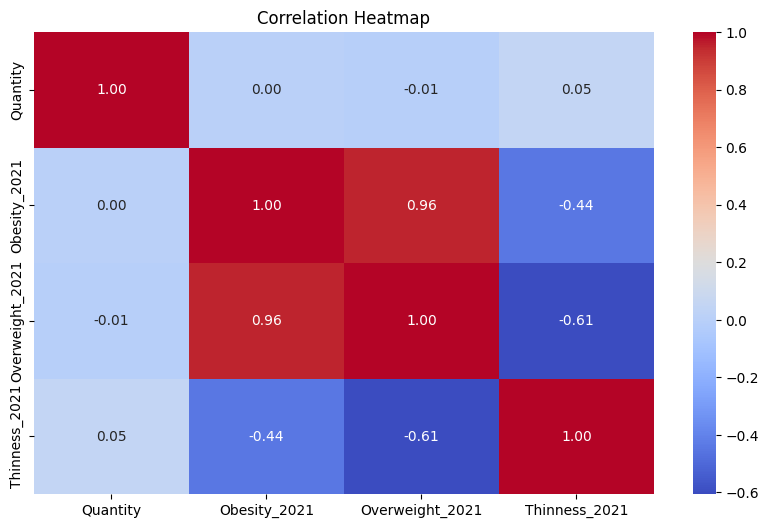

In [37]:
import pandas as pd

# Load dataset
file_path = '/content/transformed_data.csv'
data = pd.read_csv(file_path)

# Filter relevant columns
relevant_data = data[['Food_Item', 'Quantity', 'Obesity_2021', 'Overweight_2021', 'Thinness_2021']]
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = relevant_data[['Quantity', 'Obesity_2021', 'Overweight_2021', 'Thinness_2021']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


The above correlation heatmap visualizes the relationships between food supply (Quantity) and health indicators (Obesity_2021, Overweight_2021, Thinness_2021). Key findings include:



*   Obesity_2021 and Overweight_2021 have a strong positive correlation (0.96), indicating a close relationship between these health outcomes.

*  Quantity shows little to no correlation with the health indicators, suggesting food supply alone may not directly influence these outcomes.

*   Thinness_2021 has a negative correlation with Obesity_2021 (-0.44) and Overweight_2021 (-0.61), reflecting an inverse relationship between thinness and excess weight.




*Visualization_2*

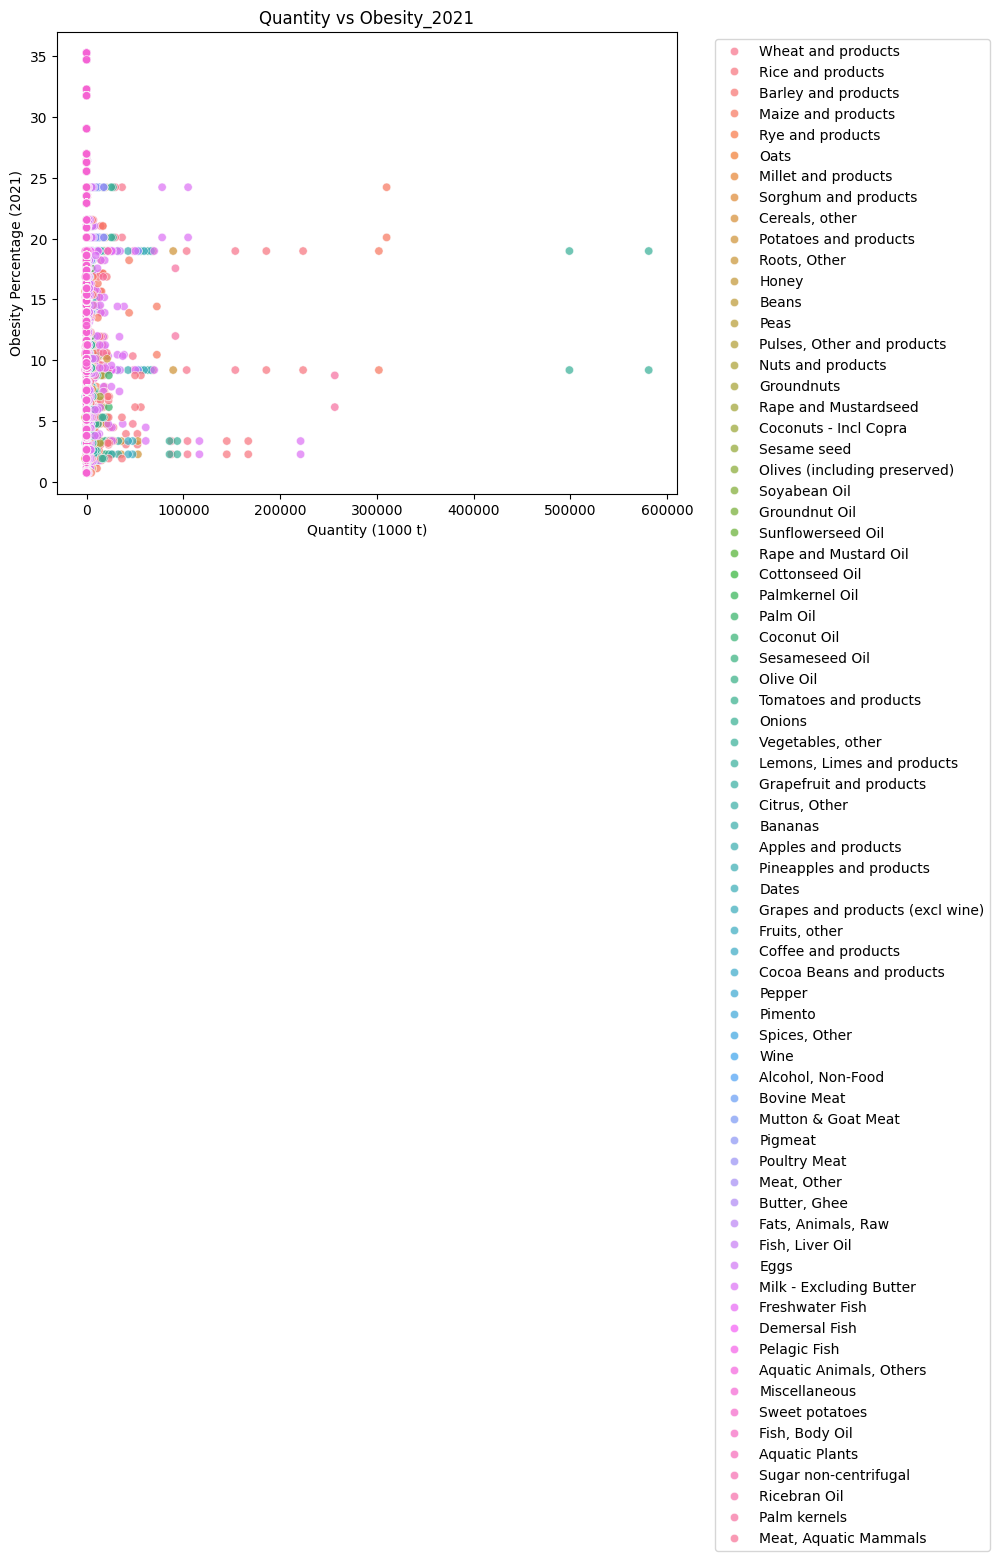

In [61]:
# Scatter Plot: Quantity vs Obesity_2021
plt.figure(figsize=(8, 6))
sns.scatterplot(data=relevant_data, x='Quantity', y='Obesity_2021', hue='Food_Item', alpha=0.7)
plt.title('Quantity vs Obesity_2021')
plt.xlabel('Quantity (1000 t)')
plt.ylabel('Obesity Percentage (2021)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The above scatter plot visualizes the relationship between food supply quantity (in 1000 t) and adolescent obesity rates (Obesity_2021), categorized by food items. Most data points are concentrated at lower supply quantities, indicating that smaller-scale food items dominate the dataset. Obesity percentages vary significantly, with some food items correlating with higher obesity rates, while others show minimal impact.

Large-scale food supplies, such as staple crops (e.g., wheat, rice, and maize), are positioned further along the x-axis but don’t exhibit a clear linear relationship with obesity. This suggests that factors beyond supply quantity, such as dietary patterns or food processing, influence obesity rates.

*Visualization_3*

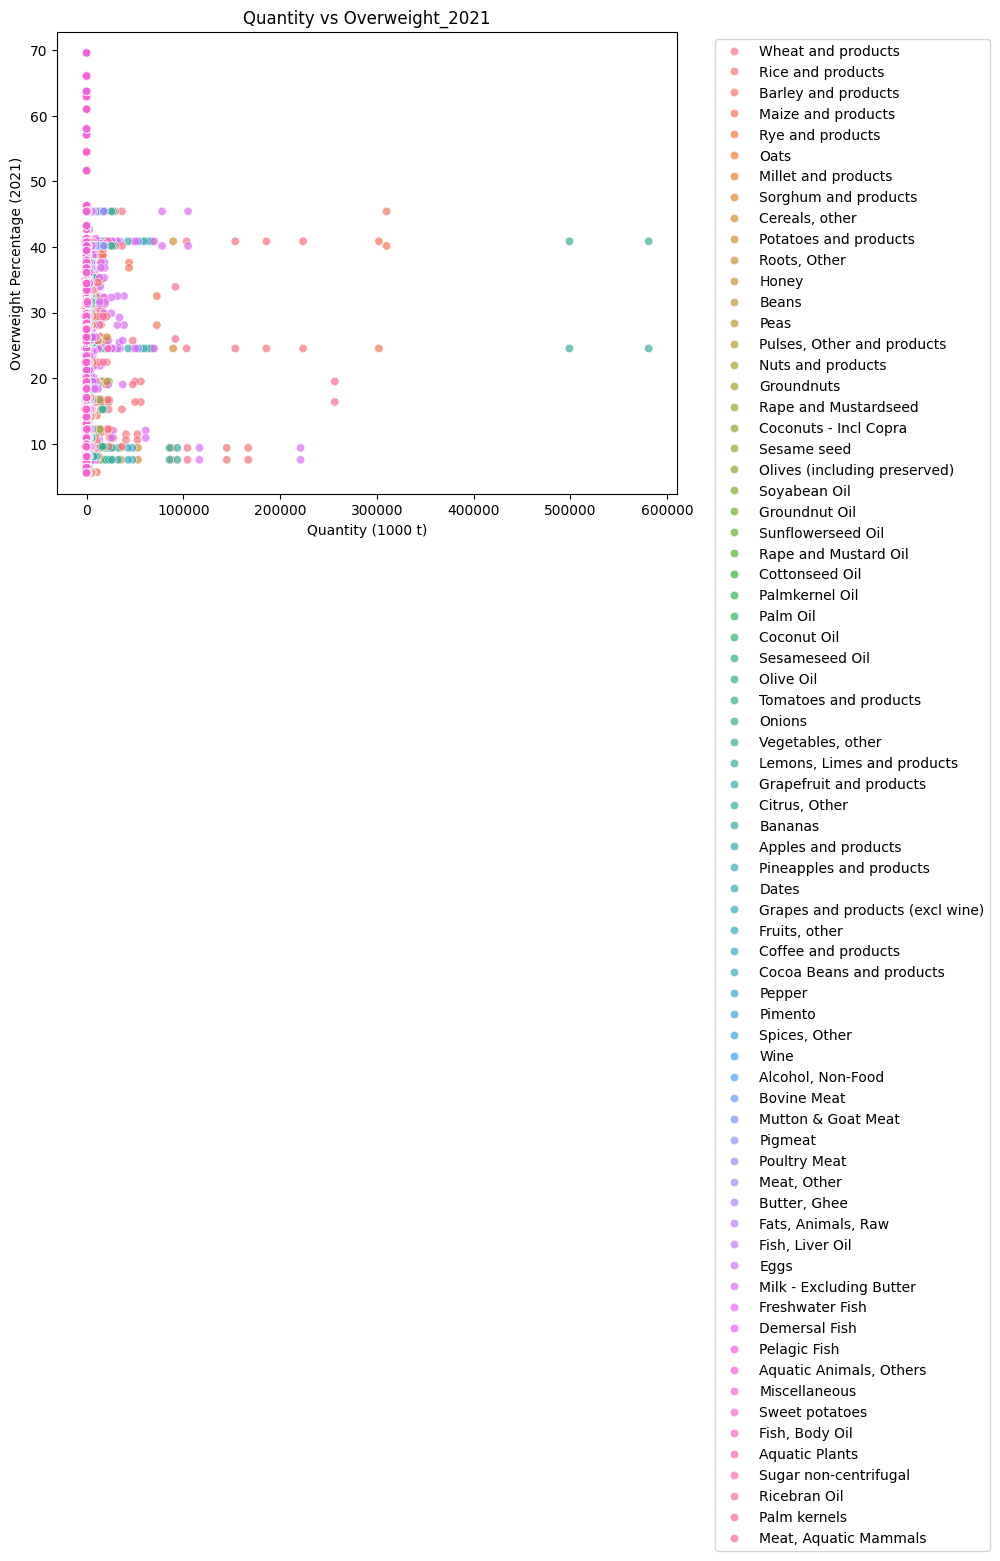

In [62]:
# Scatter Plot: Quantity vs Overweight_2021
plt.figure(figsize=(8, 6))
sns.scatterplot(data=relevant_data, x='Quantity', y='Overweight_2021', hue='Food_Item', alpha=0.7)
plt.title('Quantity vs Overweight_2021')
plt.xlabel('Quantity (1000 t)')
plt.ylabel('Overweight Percentage (2021)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The above scatter plot illustrates the relationship between food supply quantity (in 1000 t) and adolescent overweight rates (Overweight_2021) across various food items. Most data points are concentrated at lower supply levels, where overweight rates exhibit considerable variation. This indicates that smaller-scale food availability impacts regions differently.

Some food items with higher supply quantities, such as staple crops, show moderate overweight rates but no clear linear relationship with supply quantity. Overweight percentages peak in certain regions, suggesting external factors like dietary preferences, food processing, and accessibility may play a critical role in driving overweight rates, beyond just food supply quantity.

*Visualization_4*

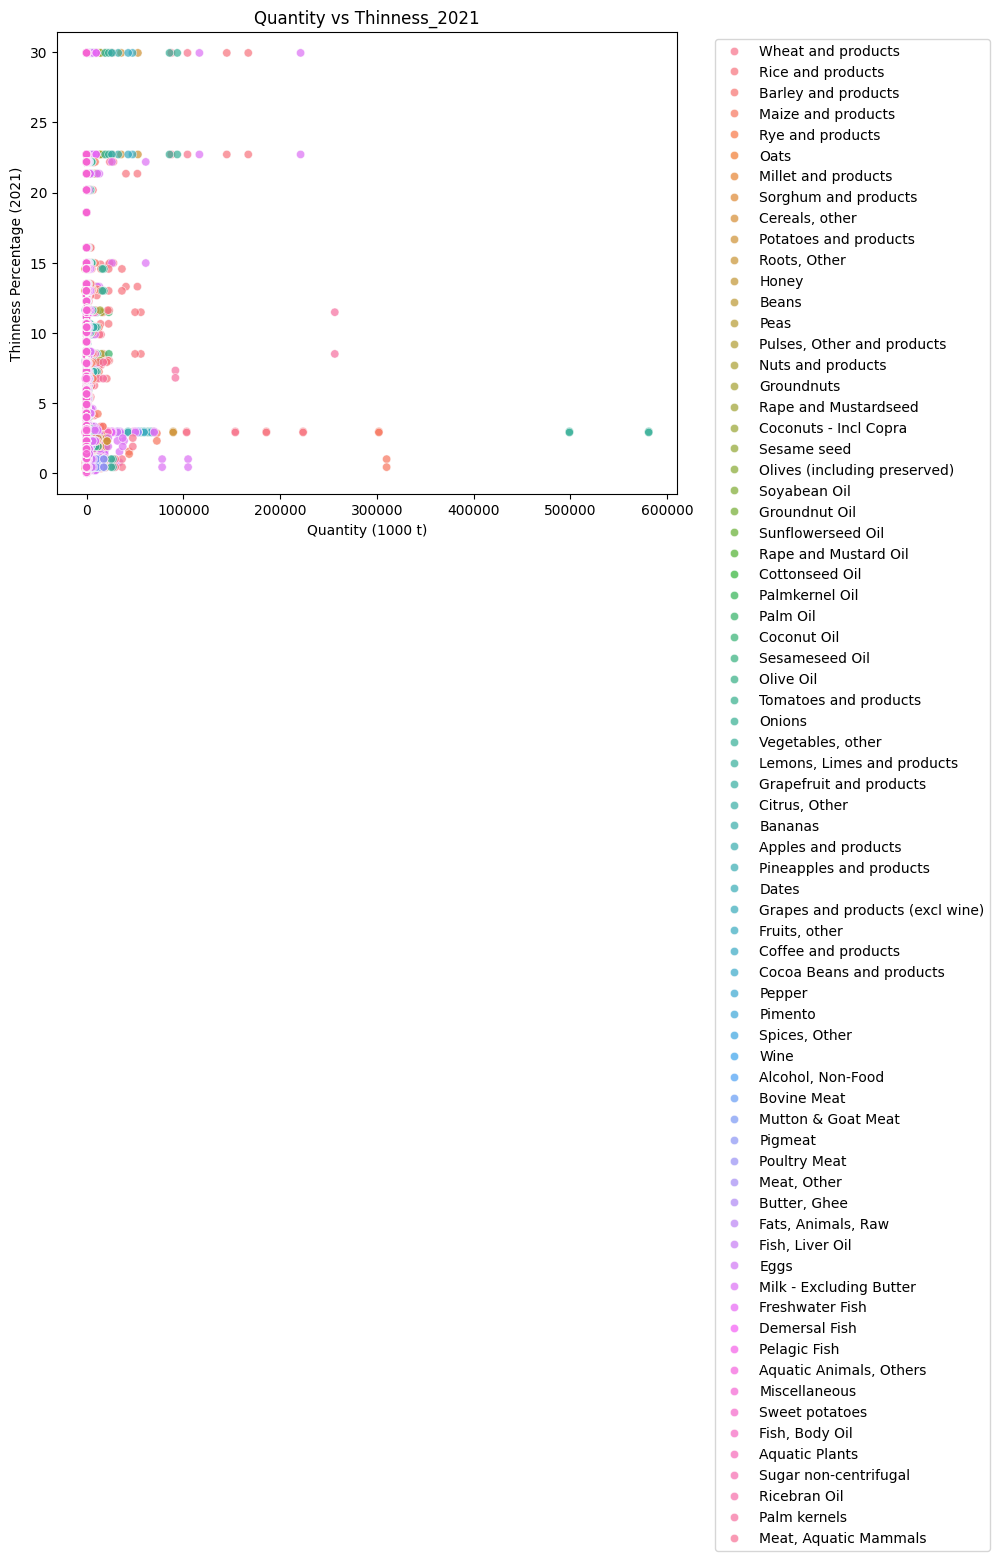

In [63]:
# Scatter Plot: Quantity vs Thinness_2021
plt.figure(figsize=(8, 6))
sns.scatterplot(data=relevant_data, x='Quantity', y='Thinness_2021', hue='Food_Item', alpha=0.7)
plt.title('Quantity vs Thinness_2021')
plt.xlabel('Quantity (1000 t)')
plt.ylabel('Thinness Percentage (2021)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The above scatter plot depicts the relationship between food supply quantity (in 1000 t) and adolescent thinness rates (Thinness_2021) for various food items. Most data points are concentrated at lower supply levels, indicating that thinness is prevalent in regions with smaller-scale food availability. Higher thinness percentages are observed in areas with limited food supply, while large-scale food items, like staple crops, exhibit lower thinness rates.

This pattern highlights the potential link between inadequate food supply and malnutrition. However, the lack of a strong linear trend suggests that factors beyond quantity, such as dietary diversity and food accessibility, significantly influence thinness rates.

*Visualization_5*

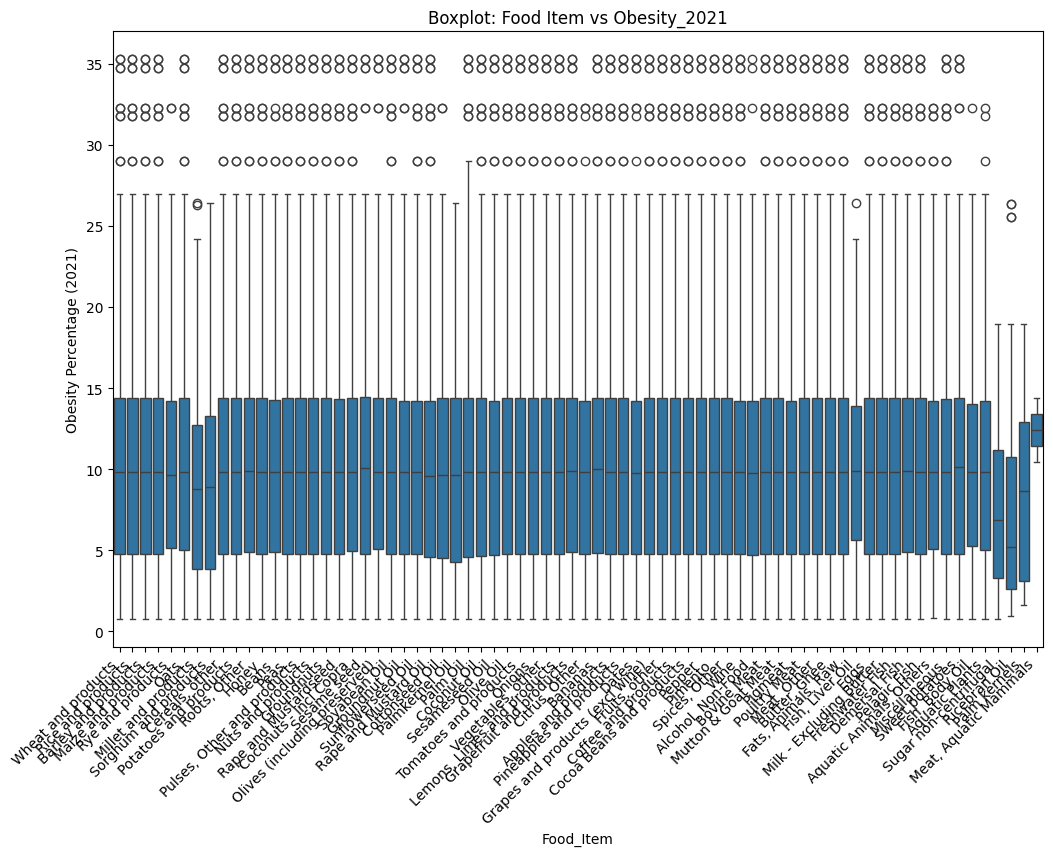

In [64]:
# Box Plot: Food Item vs Obesity_2021
plt.figure(figsize=(12, 8))
sns.boxplot(data=relevant_data, x='Food_Item', y='Obesity_2021')
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot: Food Item vs Obesity_2021')
plt.ylabel('Obesity Percentage (2021)')
plt.show()


The above boxplot compares food items against obesity rates (Obesity_2021) to reveal variations in obesity across different food groups. Each box represents the distribution of obesity percentages for a specific food item. The median values for most food items are clustered between 10% and 20%, indicating similar obesity levels across different categories.

Outliers are prevalent, especially among certain food items, suggesting localized spikes in obesity influenced by specific dietary habits. The spread of obesity rates varies, with some food items showing tight distributions, while others exhibit broader variability. This highlights the complexity of linking food supply to obesity rates, emphasizing the need to consider other factors like cultural preferences, nutritional quality, and consumption patterns.

*Visualization_6*

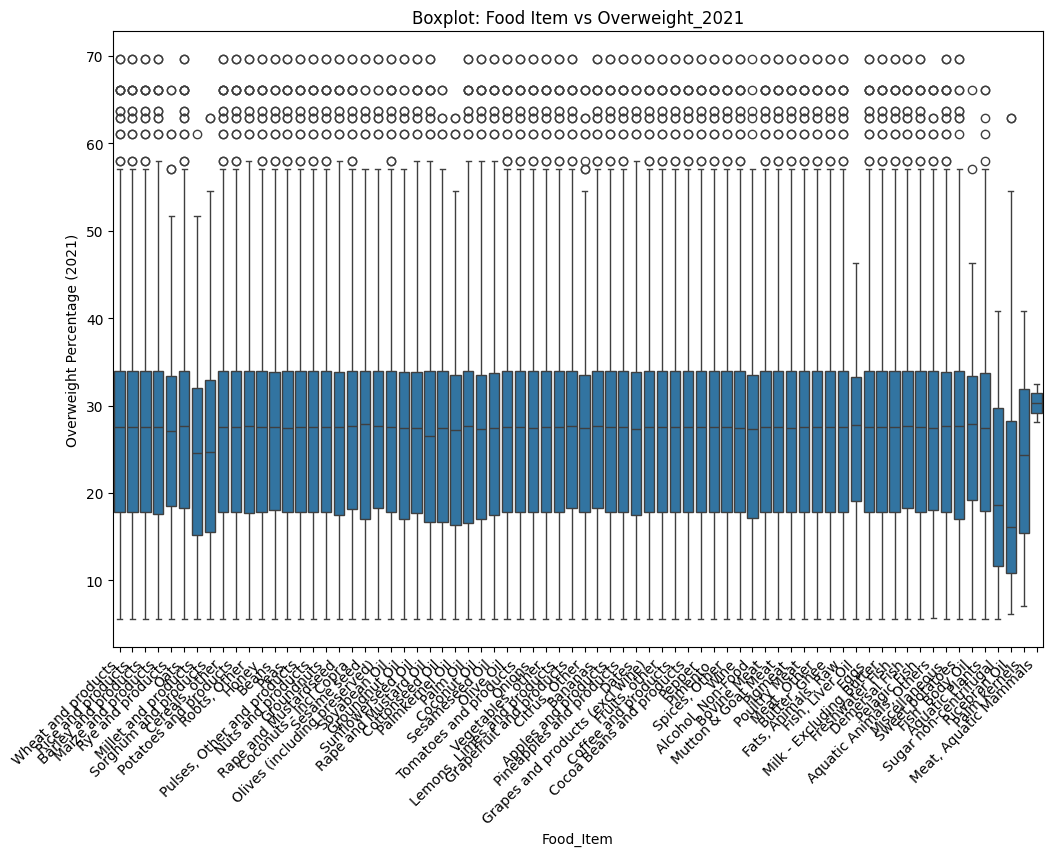

In [65]:
# Box Plot: Food Item vs Overweight_2021
plt.figure(figsize=(12, 8))
sns.boxplot(data=relevant_data, x='Food_Item', y='Overweight_2021')
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot: Food Item vs Overweight_2021')
plt.ylabel('Overweight Percentage (2021)')
plt.show()


The above boxplot visualizes the relationship between food items and overweight rates (Overweight_2021). Most food items have median overweight percentages between 20% and 40%, with a relatively consistent spread across categories. Outliers are common, particularly for certain food items, indicating regions with significantly higher overweight rates.

The variability in overweight percentages reflects the complex interaction between food supply and dietary patterns. While some food items exhibit tight distributions, others show wide spreads, suggesting varying impacts on overweight rates due to cultural and nutritional factors. This analysis highlights that food availability alone does not fully explain overweight rates, emphasizing the importance of consumption patterns and lifestyle factors.

*Visualization_7*

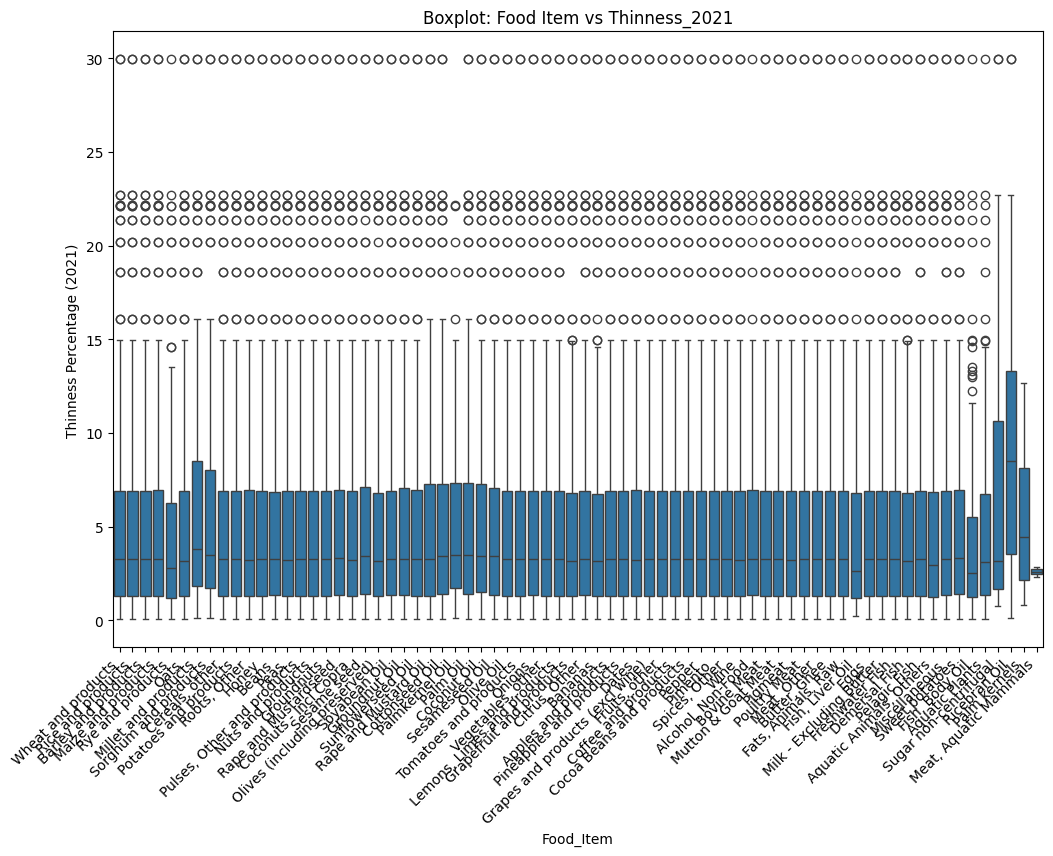

In [66]:
# Box Plot: Food Item vs Thinness_2021
plt.figure(figsize=(12, 8))
sns.boxplot(data=relevant_data, x='Food_Item', y='Thinness_2021')
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot: Food Item vs Thinness_2021')
plt.ylabel('Thinness Percentage (2021)')
plt.show()


The above boxplot displays the relationship between food items and thinness rates (Thinness_2021). Median thinness percentages for most food items range between 5% and 10%, with significant variability and many outliers observed, particularly for some food categories.

Outliers above 15% suggest that certain regions experience disproportionately high thinness rates, potentially indicating severe nutritional deficiencies or food scarcity. The tight interquartile range for most food items reflects consistent thinness rates across different populations.

This visualization highlights the importance of exploring factors beyond food supply, such as food accessibility, socioeconomic conditions, and dietary diversity, to understand and address thinness in affected populations.

*Visualization_8*

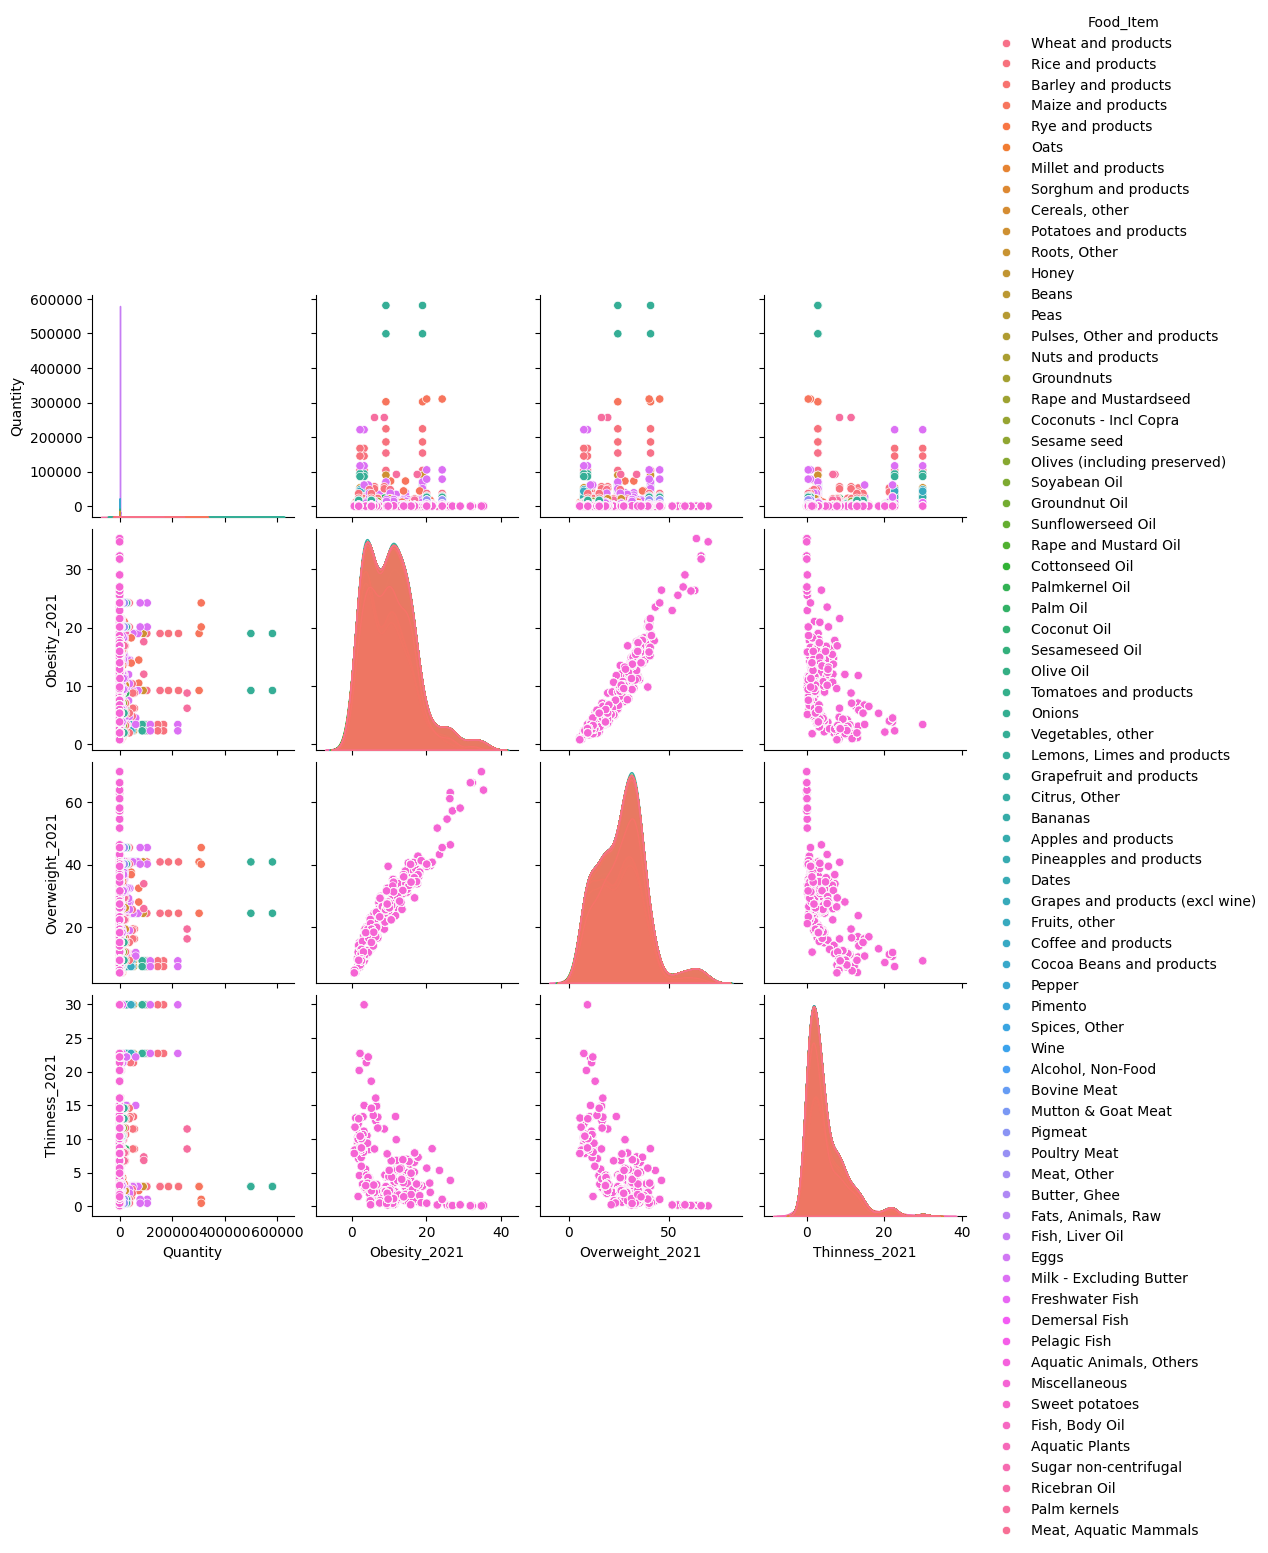

In [67]:
# Pair Plot
sns.pairplot(relevant_data, hue="Food_Item", diag_kind="kde")
plt.show()


The above pair plot provides a comprehensive overview
of the relationships between Quantity, Obesity_2021, Overweight_2021, and Thinness_2021, categorized by food items. Key observations include:


1.   Obesity_2021 and Overweight_2021 exhibit a strong positive linear correlation, indicating these health outcomes often increase together across populations.
2.   Thinness_2021 shows a negative correlation with both Obesity_2021 and Overweight_2021, reflecting an inverse relationship between thinness and excess weight indicators.


3.   The scatter plots for Quantity reveal no strong correlation with the health indicators, suggesting that food supply alone may not directly impact obesity, overweight, or thinness rates.
4.  
The diagonal histograms highlight the distributions of each variable. Thinness is skewed towards lower percentages, while overweight and obesity have wider distributions.







This visualization emphasizes the complexity of health outcomes influenced by factors beyond food supply, such as dietary patterns, nutritional diversity, and socio-economic conditions. It aids in understanding how different food items relate to health indicators.








*Visualization_9*

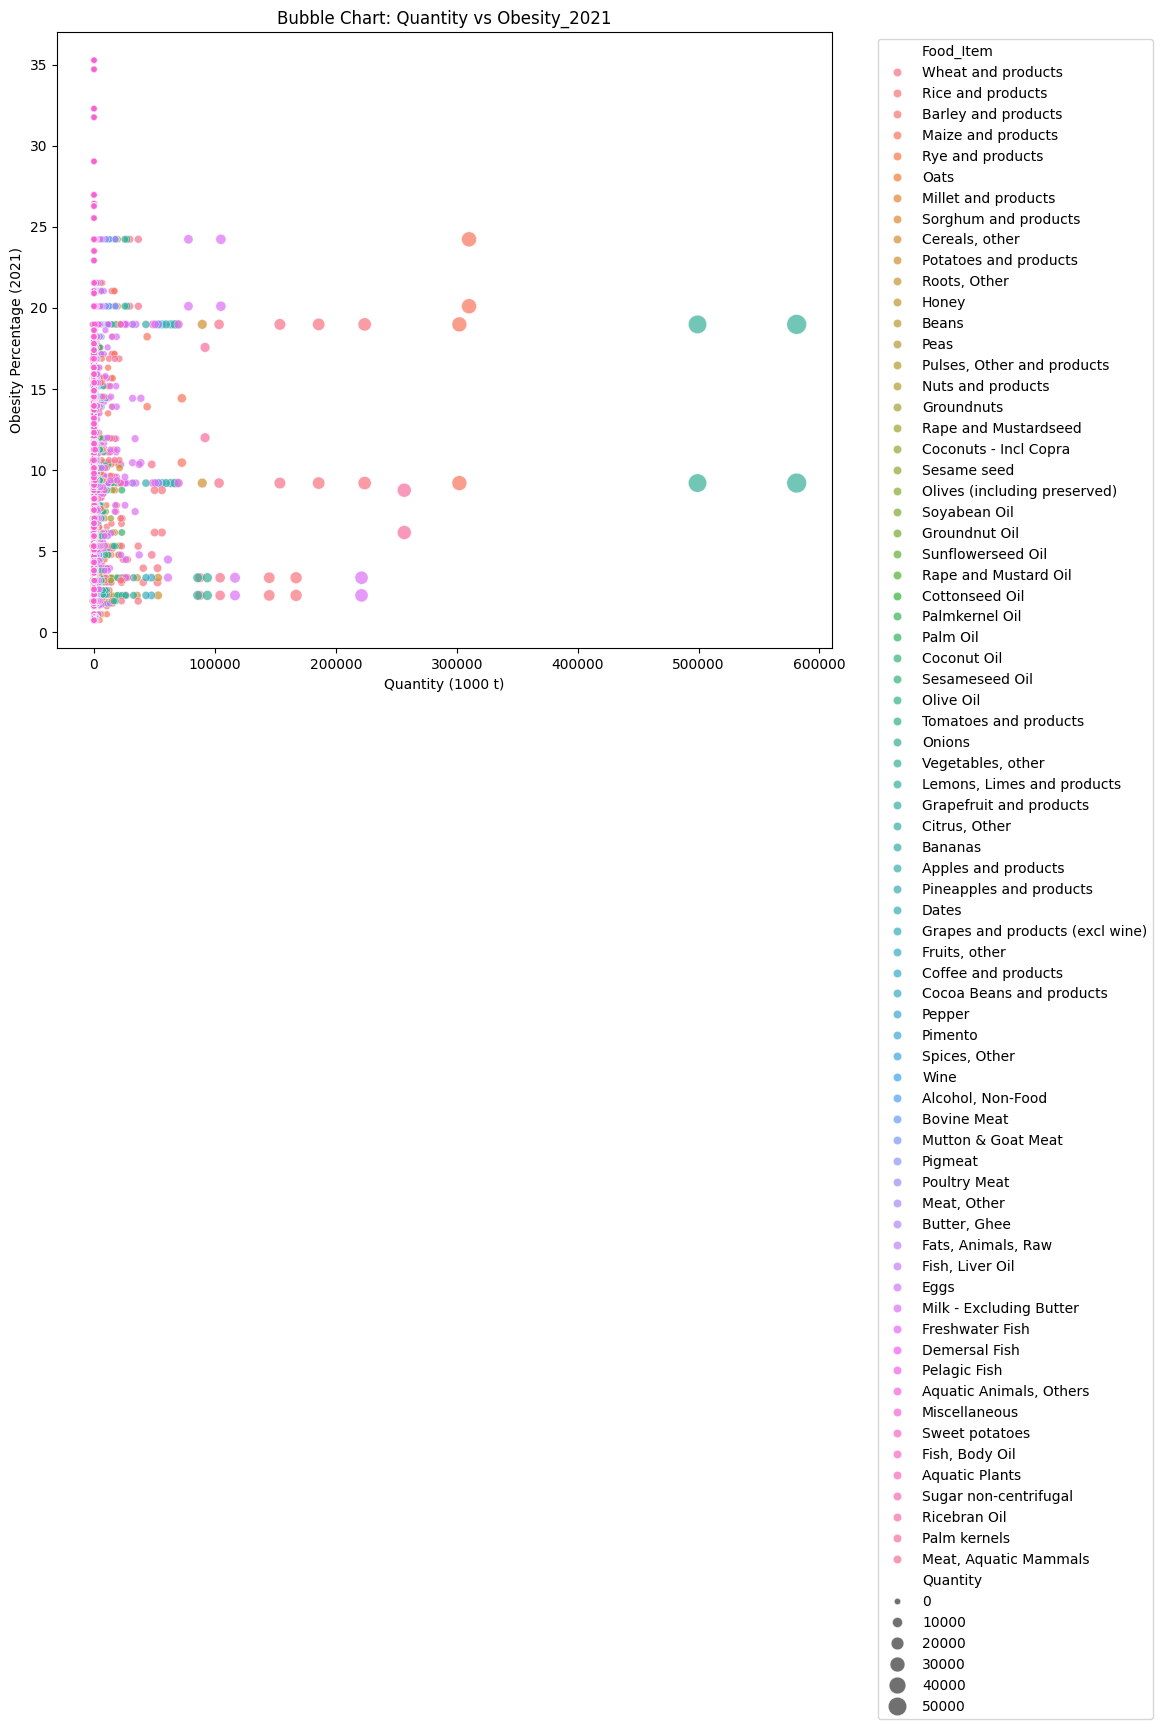

In [68]:
# Bubble Chart: Quantity vs Obesity_2021
plt.figure(figsize=(10, 8))
bubble_sizes = relevant_data['Quantity'] / 10  # Scale sizes for better visualization
sns.scatterplot(
    data=relevant_data,
    x='Quantity', y='Obesity_2021',
    size=bubble_sizes, hue='Food_Item', alpha=0.7, sizes=(20, 200)
)
plt.title('Bubble Chart: Quantity vs Obesity_2021')
plt.xlabel('Quantity (1000 t)')
plt.ylabel('Obesity Percentage (2021)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The above bubble chart visualizes the relationship between food supply quantity (in 1000 t) and obesity rates (Obesity_2021), categorized by food items. Each bubble's size represents the quantity supplied, with larger bubbles indicating higher food availability.

Most data points cluster at lower quantities, suggesting smaller-scale food supply dominates. However, obesity rates show significant variation, with no clear linear relationship between quantity and obesity. Some large-scale staple crops, like wheat and rice, are positioned higher on the x-axis but do not consistently correlate with obesity rates.

This chart highlights that while food quantity is a factor, other elements, such as dietary diversity, food processing, and regional consumption patterns, likely play more substantial roles in determining obesity rates. The chart effectively showcases the multidimensionality of food supply's impact on public health.

**Project Overview**

This project showcase the intricate relationships between food supply and adolescent health outcomes, specifically obesity, overweight, and thinness rates, using a comprehensive data-driven approach. By combining datasets from FAOSTAT and the Global Nutrition Report, we analyzed how food availability impacts health indicators across countries. The findings reveal critical insights into the role of food supply in global health while emphasizing the importance of multi-dimensional factors influencing these outcomes.

The analysis identified several patterns. While food supply is a critical driver of nutritional outcomes, its direct relationship with health indicators like obesity, overweight, and thinness is not always linear or consistent.

For policymakers, researchers, and public health organizations, this project sends an important message: food supply is only one piece of the puzzle in addressing global nutrition and health challenges. Efforts to combat malnutrition, whether in the form of undernutrition or overnutrition, must go beyond increasing food availability. Instead, interventions should focus on improving the quality, diversity, and accessibility of food. For example, policies that encourage the production and distribution of nutrient-dense foods, such as fruits, vegetables, and lean proteins, can play a critical role in promoting balanced diets.

Moreover, education campaigns are essential for fostering healthy eating habits, especially in adolescents, who are at a critical stage of physical and mental development. Public health initiatives should aim to raise awareness about the importance of balanced diets, reduce the consumption of highly processed or calorie-dense foods, and address socio-economic barriers that limit access to nutritious options.

The findings also stress the importance of data-driven decision-making. Governments and organizations must use data to identify vulnerable populations, prioritize resources effectively, and monitor the impact of interventions. Integrating datasets like FAOSTAT and the Global Nutrition Report enables more holistic analyses that consider both food supply and health outcomes, leading to evidence-based solutions.

In conclusion, this project emphasizes the need for a multi-dimensional approach to tackle global health challenges. By focusing on equitable food distribution, improving nutritional quality, and promoting sustainable consumption patterns, we can address the dual burden of malnutrition and obesity. Together, through collaboration and innovation, we can create healthier, more sustainable food systems that benefit current and future generations.